# EnrichMap tutorial for one sample

## Using one gene signature

This tutorial demonstrates how to use `EnrichMap` with one slide. We demonstrate how a single gene set is supplied to the framework.

In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore" # suppress warnings

In [2]:
import warnings
warnings.filterwarnings("ignore") # suppress warnings

Import required packages for minimal example.

In [3]:
import scanpy as sc
import squidpy as sq
import enrichmap as em

In [4]:
sc.set_figure_params(dpi=100, facecolor=None, color_map="seismic", frameon=False, vector_friendly=True, transparent=True)
sc.settings._vector_friendly = False # To fix an issue with vector graphics in some versions of Scanpy

Load the dataset built-in `Squidpy` package:

In [5]:
adata = sq.datasets.visium_hne_adata()

As the data shared with raw counts, we normalise the counts.

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

Now, let"s have a look at the cell type annotations.

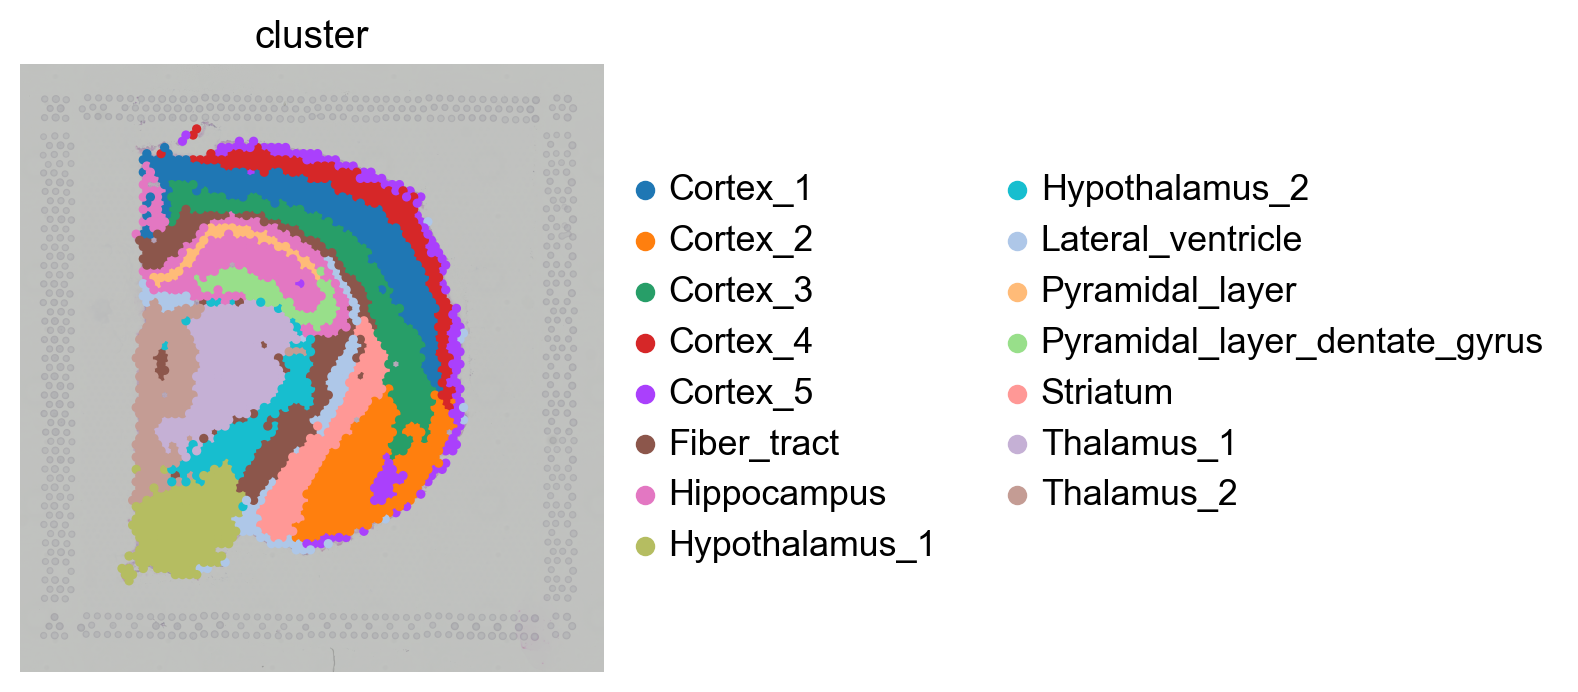

In [7]:
sq.pl.spatial_scatter(adata, color="cluster", size=2, img_alpha=0.5)

Here, we aim to recover pyramidal layer cells using a 10-gene signature.

In [8]:
gene_set = ["Fibcd1", "Lefty1", "Hpca", "Spink8", "Rprml", "Scn3b", "Neurod6", "Gm2115", "Fam131a", "Wipf3"]

### EnrichMap

In [9]:
em.tl.score(adata, gene_set=gene_set)

Scoring signatures: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


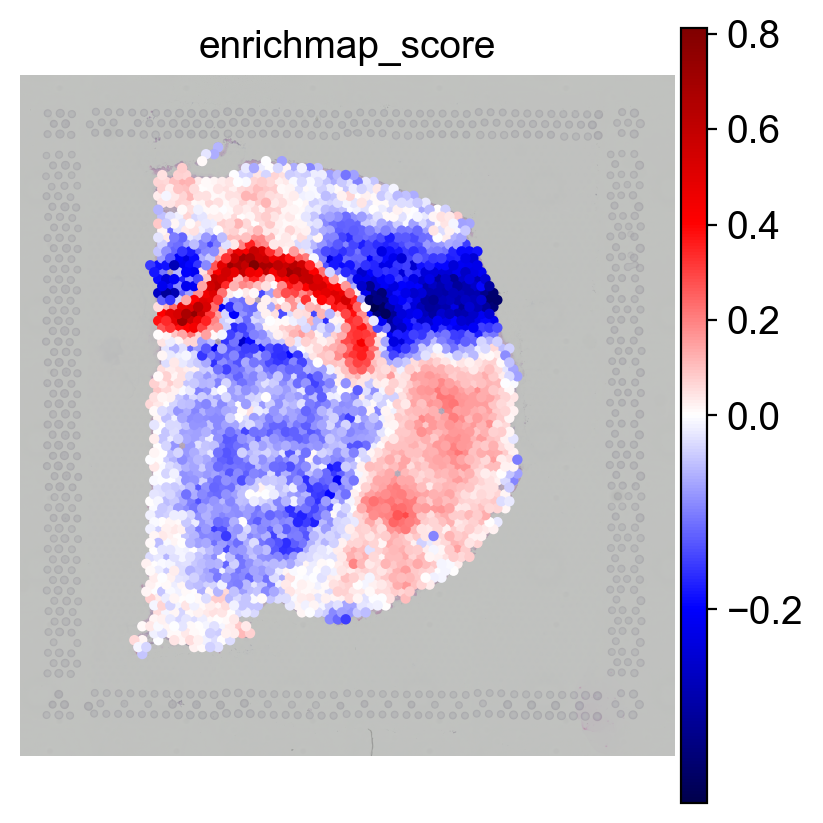

In [10]:
em.pl.spatial_enrichmap(adata, score_key="enrichmap_score", size=2, img_alpha=0.5)

Let"s now investigate what genes influenced the `EnrichMap` score the most. Here, we demonstrate top three genes.

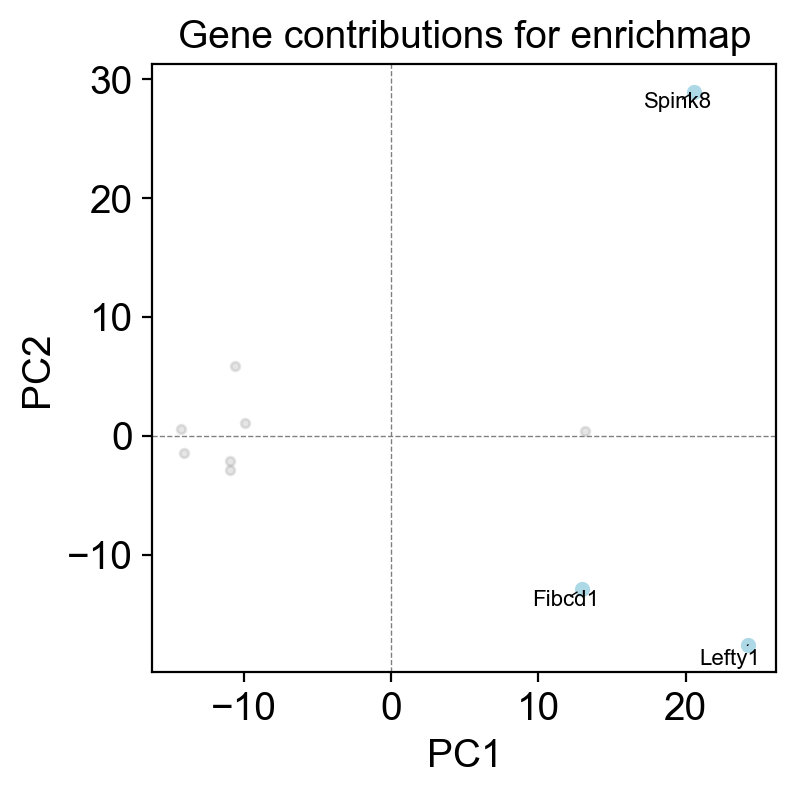

In [11]:
em.pl.gene_contributions_pca(
    adata,
    score_key="enrichmap",
    top_n_genes=3
)

Here's the individual gene expression for top three genes.

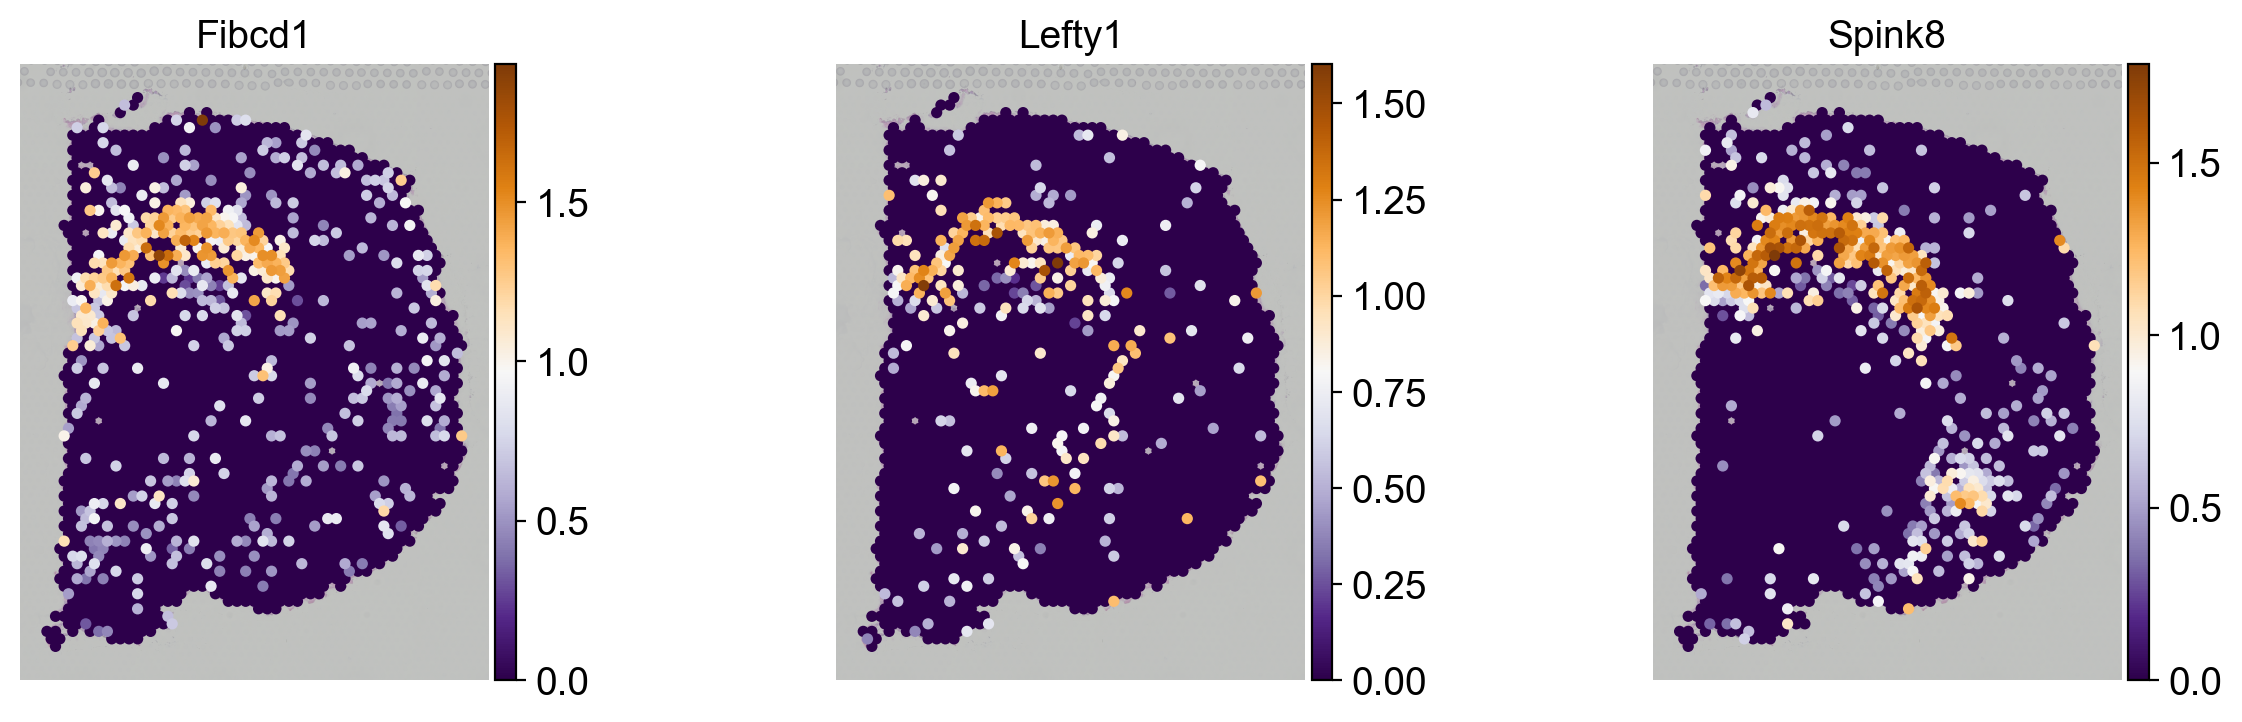

In [12]:
sc.pl.spatial(adata, color=["Fibcd1", "Lefty1", "Spink8"], size=2, alpha_img=0.5, cmap="PuOr_r", use_raw=False)

As can be seen from the spatial enrichment map, the genes in the set are enriched in specific regions of the tissue. The gene contributions plot shows the top contributing genes to the enrichment score, indicating their relative importance in the spatial context.

## Evaluate spatial autocorrelation and smoothness

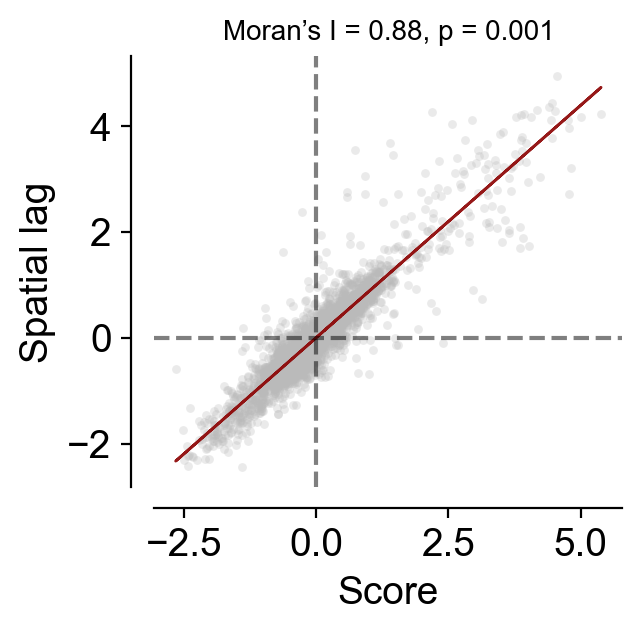

In [13]:
em.pl.morans_correlogram(adata, score_key="enrichmap_score")

Moran's *I* score shows highly spatial autocorrelation of the `EnrichMap` scores, where high-to-high and low-to-low scores are clustered together with spatial lag of the score, indication spatially coherent scoring.

We can also explore how the `EnrichMap` scores change across tissue slides. A variogram can inform the user if the scores form a continuous pattern. A sharp increase in the semivariance, then a plateau is expected.

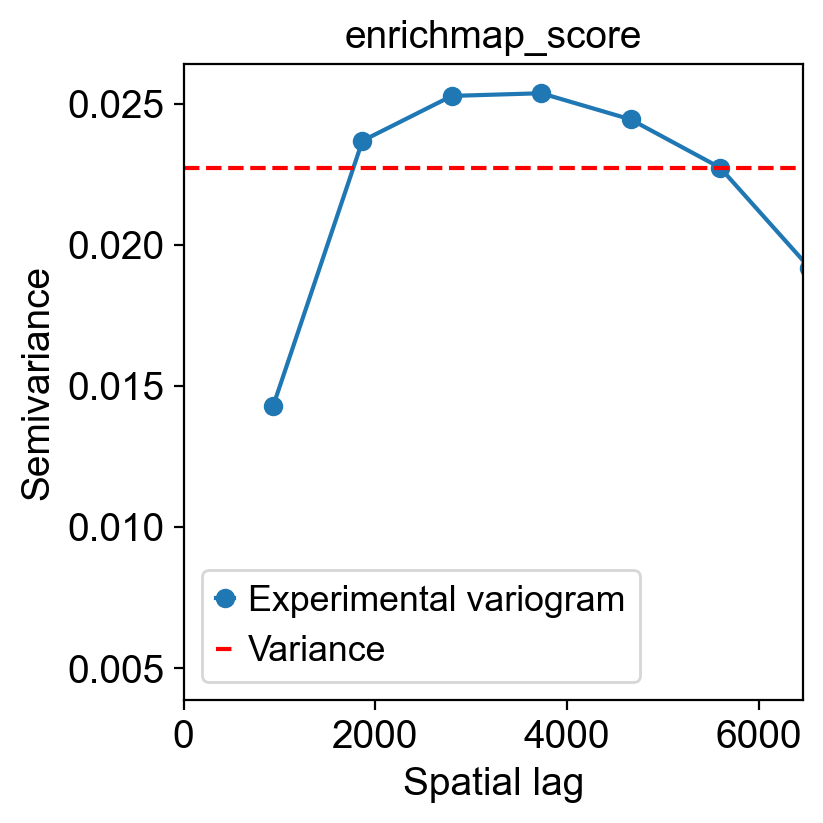

In [14]:
em.pl.variogram(
    adata,
    score_keys=["enrichmap_score"],
)

The variogram above demonstrate how smaller spatial lags are spatially coherent, whilst as the distance between two spots (or cells) increase the semivariance decreases, indicating that spots (or cells) that are closer to each other show continuity.

## Using more than one singature

If more than one signature of interest is explored, `EnrichMap` can input a dictionary with multiple signatures, in which the `key` will be used for storing scores in `adata.obs` and the corresponding `value` will be used as the gene set.

Let's now try to score for fibre tract, alongside pyramidal cells.

In [15]:
gene_set_pyramidal = gene_set
gene_set_tract = ["Mal", "Cnp", "Cryab", "Mobp", "Mag", "Plp1", "Cldn11", "Tspan2", "Qdpr", "Mog"]

In [16]:
signature_dict = {
    "pyramidal": gene_set_pyramidal,
    "tract": gene_set_tract
}

In [17]:
em.tl.score(adata, gene_set=signature_dict)

Scoring signatures: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


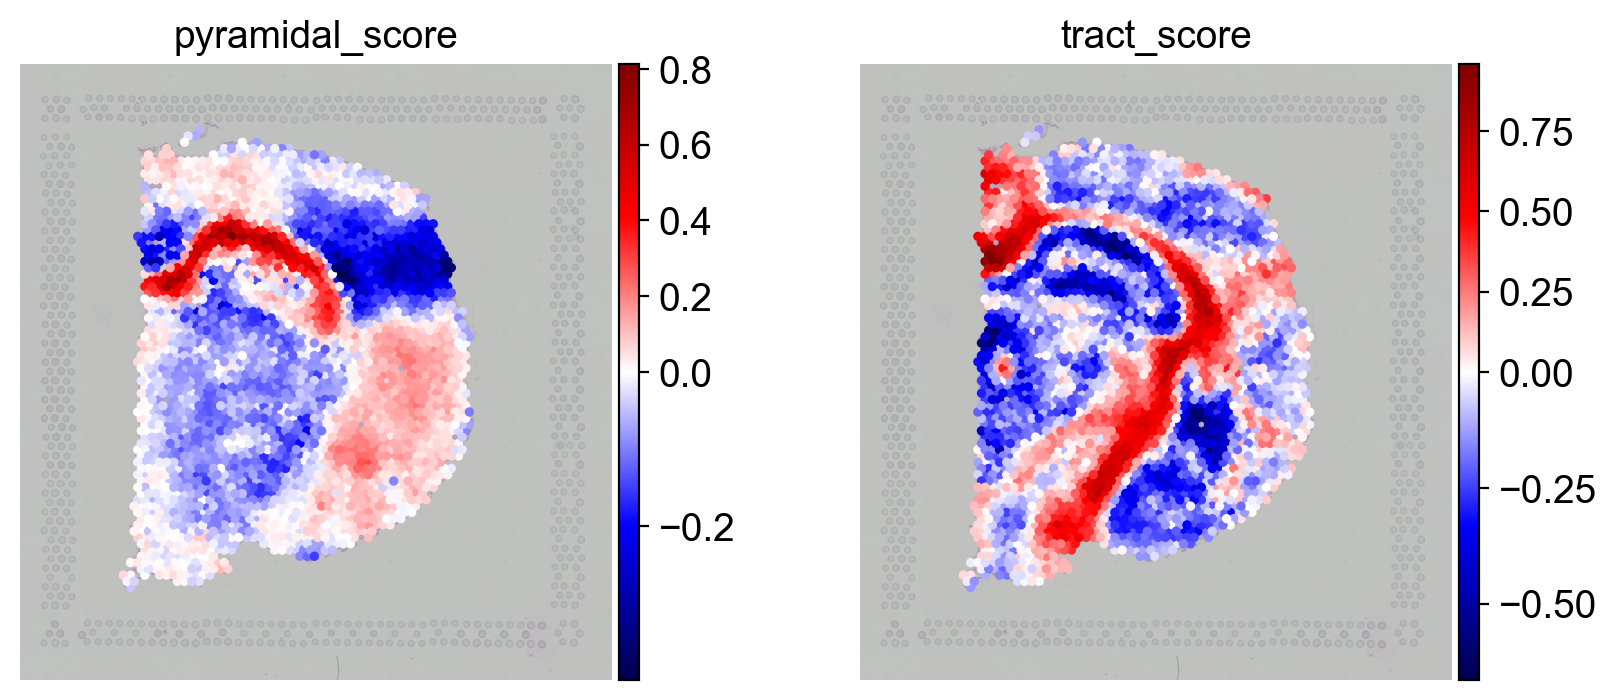

In [18]:
em.pl.spatial_enrichmap(adata, score_key=["pyramidal_score", "tract_score"], size=2, img_alpha=0.5)